In [27]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans

raw = pd.read_hdf("training.h5",  "/data/coach1")
del raw["#"]
df_scaled = raw[raw.columns] = StandardScaler().fit_transform(raw)
df_scaled.shape

(75, 99)

In [31]:
def kmean_hyper_param_tuning(data):
    """
    Hyper parameter tuning to select the best from all the parameters on the basis of silhouette_score.
    :param data: dimensionality reduced data after applying PCA
    :return: best number of clusters for the model (used for KMeans n_clusters)
    """
    # candidate values for our number of cluster
    parameters = [2, 3, 4, 5, 10, 15, 20, 25, 30]

    # instantiating ParameterGrid, pass number of clusters as input
    parameter_grid = ParameterGrid({'n_clusters': parameters})

    best_score = -1
    kmeans_model = KMeans()     # instantiating KMeans model
    silhouette_scores = []

    # evaluation based on silhouette_score
    for p in parameter_grid:
        kmeans_model.set_params(**p)    # set current hyper parameter
        kmeans_model.fit(data)          # fit model on wine dataset, this will find clusters based on parameter p

        ss = metrics.silhouette_score(data, kmeans_model.labels_)   # calculate silhouette_score
        silhouette_scores += [ss]       # store all the scores

        print('Parameter:', p, 'Score', ss)

        # check p which has the best score
        if ss > best_score:
            best_score = ss
            best_grid = p

    # plotting silhouette score
    plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
    plt.xticks(range(len(silhouette_scores)), list(parameters))
    plt.title('Silhouette Score', fontweight='bold')
    plt.xlabel('Number of Clusters')
    plt.show()

    return best_grid['n_clusters']


HyperTuning the Parameter for KMeans
Parameter: {'n_clusters': 2} Score 0.4533706804743149
Parameter: {'n_clusters': 3} Score 0.4452223976350827
Parameter: {'n_clusters': 4} Score 0.4623331947498004
Parameter: {'n_clusters': 5} Score 0.4744833057041434
Parameter: {'n_clusters': 10} Score 0.40415763254844905
Parameter: {'n_clusters': 15} Score 0.39677023461576716
Parameter: {'n_clusters': 20} Score 0.4076636288152289
Parameter: {'n_clusters': 25} Score 0.401517755786637
Parameter: {'n_clusters': 30} Score 0.3784209617674216
Parameter: {'n_clusters': 35} Score 0.3396659066425808
Parameter: {'n_clusters': 40} Score 0.2921497695424967


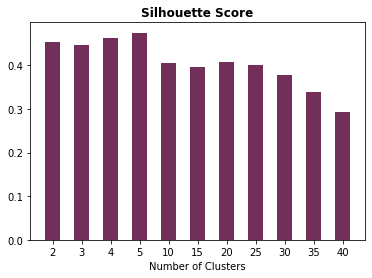

optimum num of clusters = 5
Explained variation per principal component: [0.53652576 0.1892603 ]
Cumulative variance explained by 2 principal components: 72.58%


In [30]:
print("HyperTuning the Parameter for KMeans")
optimum_num_clusters = kmean_hyper_param_tuning(df_scaled)
print("optimum num of clusters =", optimum_num_clusters)

pca_2 = PCA(n_components=2)
pca_result = pca_2.fit_transform(df_scaled)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))
    

In [32]:
# fitting KMeans
#kmeans = KMeans(n_clusters=optimum_num_clusters)
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_scaled)

print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 0 0 0 0 4 0 0 0 0 0 4 4 4 4 4 4 4 4 4
 4]


In [33]:
centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

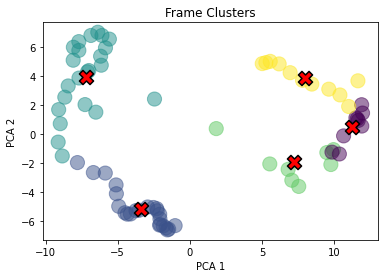

In [34]:
x = pca_result[:, 0]
y = pca_result[:, 1]

plt.scatter(x, y, c=kmeans.labels_, alpha=0.5, s= 200)  # plot different colors per cluster
plt.title('Frame Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, linewidths=1.5, color='red', edgecolors="black", lw=1.5)

plt.show()